# Basic Python Operations and Word Count

#### Text Analytics
- **load a text file into memory** using Python's built-in streaming libraries
- **visualize word count and line length distributions** as histograms using Matplotlib

#### Software Engineering
- **read strings from a text input/output stream** using `readline()` and `readlines()`
- **use both native Python dictionaries and `collections.Counter` objects** to produce word counts for a text corpus
- perform basic search/replace operations using **regular expressions**
- use `map()` and `filter()` functions to efficiently transform and filter large amounts of text (if time today!)


## Loading Text into Memory

There are a variety of ways to hold data within memory. For text analytics and natural language processing purposes, we'll be most concerned with the following:

- **list**
- **set**
- **dictionary**
- **tuple**
- **Numpy array**

Imagine that we would like to find the most commonly used words in ***A Tale of Two Cities***, by the famed English novelist Charles Dickens, stored in a text file called **`tale-of-two-cities.txt`**, in the same directory as this Jupyter notebook. Later on, we'll use 3rd-party libraries to automate much of the processing, but for now, we'll explore Python's built-in functions for text processing.

#### Opening Files
The **`open()`** function takes *two* parameters; **filename**, and **mode**. In our case, `mode` is set to `r` for **read**, since we plan to read the file's contents, as opposed to `w` (write), or `a` (append).

In [53]:
# Open Tale of Two cities and print the object
text_file = open("tale-of-two-cities.txt", "r", encoding=)
text_file

<_io.TextIOWrapper name='tale-of-two-cities.txt' mode='r' encoding='UTF-8'>

Typically, a text character is **1 byte** in size. One byte is equal to **32 bits**. This means conceptually, the size of a string should be $N$ bytes, where $N$ is the number of characters. However, you'll see that in Python, the size of a string is larger:

In [12]:
# find out the sizes of different variables in Python

import sys
EMPTY_STRING = ""
ONE_CHAR_STRING = "a"
TWO_CHAR_STRING = "ab"

print(f"{ONE_CHAR_STRING} is {sys.getsizeof(ONE_CHAR_STRING)}")
print(f"{EMPTY_STRING} is {sys.getsizeof(EMPTY_STRING)}")
print(f"{TWO_CHAR_STRING} is {sys.getsizeof(TWO_CHAR_STRING)}")


a is 50
 is 49
ab is 51


The **`open()`** function returns a **`TextIOWrapper`** object from Python's `io` module, which handles common input/output streaming operations. 

A **stream** is a potentially infinite sequence of elements (in our case, characters) arriving over time. You'll use streams to model data that is **unbounded** (it's undetermined the volume, the length, and frequency of the data). A stream has a pointer to its current position within the sequence. 

This object has an extremely helpful **`readline()`** method that reads from a text file until encountering an **`EOF`** marker or a new line symbol.

In [17]:
# read a line from the text
text_file.readline(3)

'IT '

You can pass in a parameter to **`readline()`** to control how many bytes of input stream data you'll receive. For instance, **`readline(2)`** returns at most 2 bytes of text input data. You might use this, for instance, if your Python application is reading not from a flat text file, but from a socket, which supplies a continuous stream of data with fixed length (ie., the messages all have the same number of characters).

**In-Class Question**: *Assume you just opened the text file with **`open()`**. What output is returned when **`text_file.readline(5)`** is called the **second** time?*
- **A)** The entire **first line** of the novel
- **B)** The first **5 characters** of the second line
- **C)** The entire **second line** of the novel
- **D)** The first **5 characters** of the first line
- **E)** The **6th-10th characters** of the first line

Each time that you call **`readline()`**, a position marker within **`TextIOWrapper`** is moved forward:
<img src="images/readline.png" width="500" height="300" align="center"/>
We typically will use **`readlines()`** instead to read text files line by line. This returns a Python **list**:

In [22]:
# reset the stream position and read all lines from the novel
text_file.seek(0)

0

How many lines are there in the novel? How many characters are there in the novel?

In [23]:
# find number of lines in novel
lines = text_file.readlines()
print(len(lines))

12870


### An Aside: List Comprehension

Sometimes, we need to iterate through a list and perform some sort of operation (sum all the elements, or remove a certain character). The traditional way to do this is using a for loop:

```Python
lengths = [] # declare an empty list
for line in lines: # iterate through each line
    lengths.append(len(line)) # add the length of each line to the list
```

A slightly less verbose way, called **list comprehension**, to write this is

```Python
lengths = [len(line) for line in lines]
```

List comprehension is typically slightly faster, since it avoids the additional `append()` call for each iteration of the for loop. See this example from StackOverflow:

```Python
def slower(): # using traditional iteration
    result = []
    for elem in some_iterable:
        result.append(elem)
    return result
```

```Python
def faster(): # using list comprehension
    return [elem for elem in some_iterable]
```

Within the Python REPL **(read-eval-print-loop)**:

```Python
>>> some_iterable = range(1000)
>>> import timeit
>>> timeit.timeit('f()', 'from __main__ import slower as f', number=10000)
1.4456570148468018
>>> timeit.timeit('f()', 'from __main__ import faster as f', number=10000)
0.49323201179504395
```

### Visualizing Summary Metrics Using Matplotlib

How many characters are there in each line?

In [ ]:
!pip install matplotlib

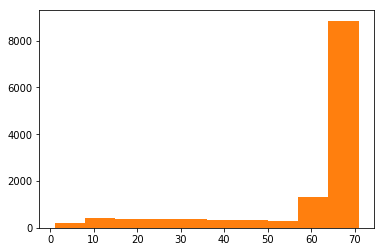

In [26]:
# Build a histogram of character lengths for each line
import matplotlib.pyplot as plt

lengths  = []
for line in lines:
    lengths.append(len(line))
    
    
plt.hist(lengths)
plt.show()

## Word Count

### First Method: Create a Dictionary to Store Word Count

Dictionaries in Python have **keys** and **values**. The keys must be unique (no duplicate keys). They can be accessed via the **`keys()`** and **`values()`** methods of a dictionary object.

In [33]:
my_dictionary = {
    "Los Angeles": "CA",
    "Boston": "MA",
    "Seattle": "WA"
}

list(my_dictionary.keys())

['Los Angeles', 'Boston', 'Seattle']

In [36]:
# build a dictionary of word counts
words = [] # a list of all words

word_counts = {}

for line in lines: # for each line in the novel
    for word in line.split(" "):
        words.append(word) # add word to list of words
        
        if word not in word_counts.keys():
            word_counts[word] = 1 # if not in dictionary
        else:
            word_counts[word] += 1 # if the word is in the dictionary
        
print(f"There's {len(word_counts.keys())} unique words in Dickens' novel")


There's 21683 unique words in Dickens' novel


Let's use Python **`sets`** to check that our dictionary's keys are unique. Remember that a set is a collection of **unique elements**, so calling **`set(words)`** will return only the unique words in our text file.

In [40]:
# check that our dictionary keys are unique
assert len(set(words)) + 1 == len(word_counts.keys()), "Words are not unique"

AssertionError: Words are not unique

### Using Python's Built-In Counter

Since the task of building a count using a dictionary is a common operation, Python provides a built-in object called `Counter` that we can use:

In [48]:
# Using Python's Counter
from collections import Counter

def count_words(lines, delimiter=" "):
    words = Counter()
    
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1 # increment counter for word
    
    return words

word_counts = count_words(lines)

A core principle of software engineering and programming is **DRY**: Don't Repeat Yourself. Since we are likely going to be making many histograms throughout this course, it's best that we create a reusable function.

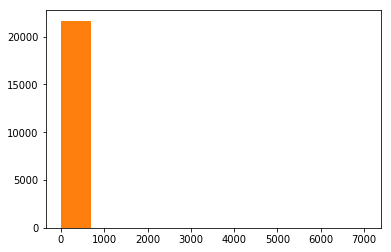

In [52]:
# Plot the histogram of word counts

import matplotlib.pyplot as plt

plt.hist(word_counts.values())
plt.show()

### In-Class Question:
- Why does this distribution look the way it does? 
- What additional steps could be taken to make the results more meaningful?

# First Steps At Preprocessing Data

In [ ]:
# build a filter function


In [ ]:
# create a function for counting words




In [ ]:
# sort the words, so we see the most popular words first




In [ ]:
# output the word counts to Pandas dataframe and ultimately CSV





# In-Class Exercise

You are a business analyst working for a major US toy retailer:

* A manager in the marketing department wants to find out the **most frequently used words in positive reviews** (five stars) and **negative reviews (one star)** in order to determine who the toys are being bought for (sons, significant others, grandchildren, siblings, self, etc.). He would like your opinion on which customer segments' (son, daughter, granddaugher, grandson, niece, nephew, sibling, significant other, etc.) marketing messaging tends to outperform other segments.

* One of your product managers suspects that **toys with batteries tend to be significantly lower rated than toys that do not require batteries**. She would like to see some data points confirming or rejecting her hypothesis.

* Clearly, the word count approach, as you'll discover, has many limitations. What are some issues your group has identified when performing text analysis using this approach?

Perform the same word count analysis using the reviews received from Amazon to answer your marketing manager's question. They are stored in two files, (`poor_amazon_toy_reviews`) and (`good-amazon-toy-reviews.txt`).